In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('clean_data.csv', index_col=[0])
print(df.size)
df.head()

6140693


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,saleyear
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,21500,2014
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,21500,2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,30000,2015
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,27750,2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,67000,2014


### find number of cars in each year

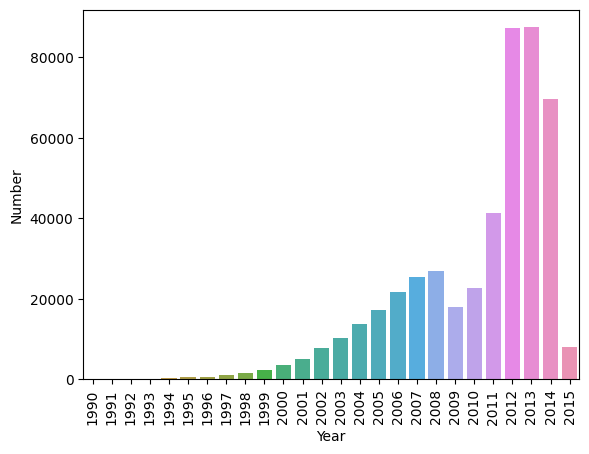

In [59]:
df_year = df.groupby(['year']).count()
df_year = df_year.reset_index()
ax = sns.barplot(y=df_year['make'],x=df_year['year'])
ax.set(xlabel='Year', ylabel='Number')
ax.tick_params(axis='x', rotation=90)
plt.show()

### find number of cars in each outside color

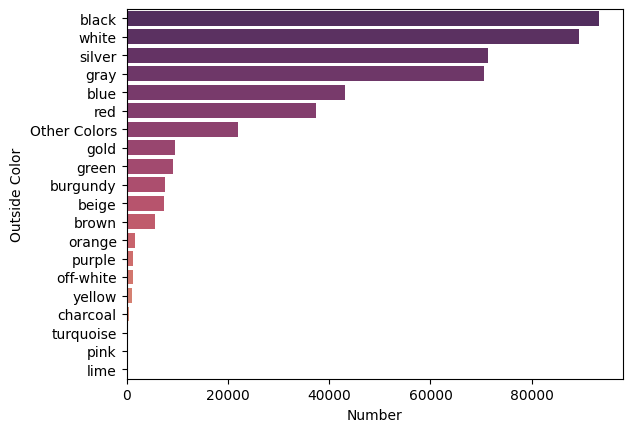

In [139]:
df_color = df.groupby(['color']).count()
df_color = df_color.reset_index()
df_color = df_color.sort_values(by=['make'],ascending=False)
df_color.at[19,'color'] = "Other Colors"
ax = sns.barplot(x=df_color['make'],y=df_color['color'], palette="flare_r", orient = 'h')
ax.set(ylabel='Outside Color', xlabel='Number')
ax.tick_params(axis='x', rotation=0)
plt.show()

# average price for each outside color

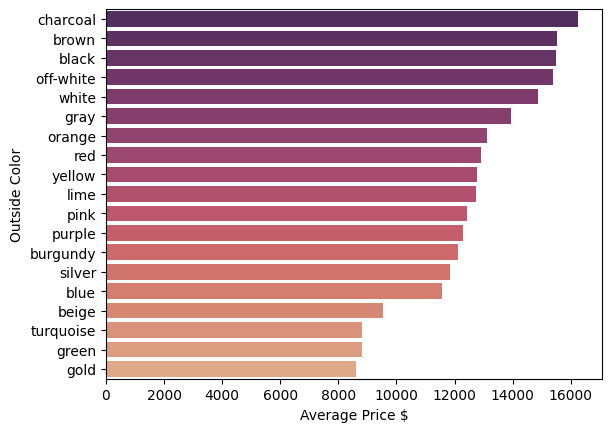

In [125]:
df_outcolor_price = df.groupby(['color']).mean()
df_outcolor_price = df_outcolor_price.reset_index()
df_outcolor_price = df_outcolor_price.sort_values(by=['sellingprice'],ascending=False)
df_outcolor_price = df_outcolor_price[1:]
ax = sns.barplot(x=df_outcolor_price['sellingprice'],y=df_outcolor_price['color'], palette="flare_r", orient = 'h')
ax.set(ylabel='Outside Color', xlabel='Average Price $')
ax.tick_params(axis='x', rotation=0)
plt.show()

# average price for each interior color

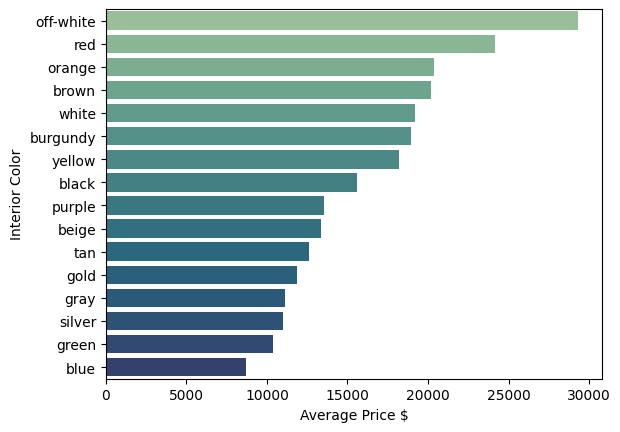

In [177]:
df_colorin_price = df.groupby(['interior']).mean()
df_colorin_price = df_colorin_price.reset_index()
df_colorin_price = df_colorin_price.sort_values(by=['sellingprice'],ascending=False)
df_colorin_price = df_colorin_price.drop(16)
ax = sns.barplot(x=df_colorin_price['sellingprice'],y=df_colorin_price['interior'], palette="crest", orient = 'h')
ax.set(ylabel='Interior Color', xlabel='Average Price $')
ax.tick_params(axis='x', rotation=0)
plt.show()

### Analysis on Condition

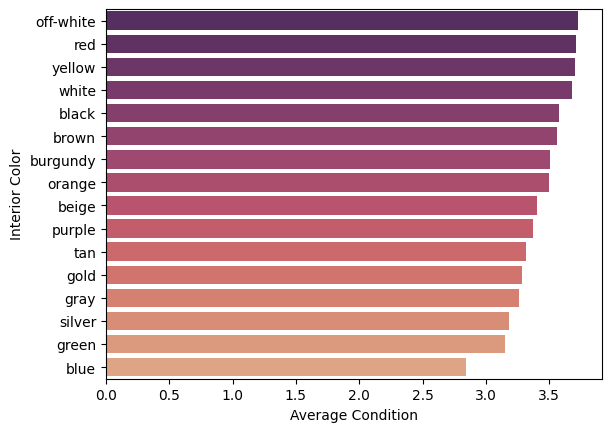

In [138]:
df_color_condition = df.groupby(['interior']).mean()
df_color_condition = df_color_condition.reset_index()
df_color_condition = df_color_condition.sort_values(by=['condition'],ascending=False)
df_color_condition = df_color_condition.drop(16)
ax = sns.barplot(x=df_color_condition['condition'],y=df_color_condition['interior'], palette="flare_r", orient = 'h')
ax.set(ylabel='Interior Color', xlabel='Average Condition')
ax.tick_params(axis='x', rotation=0)
plt.show()

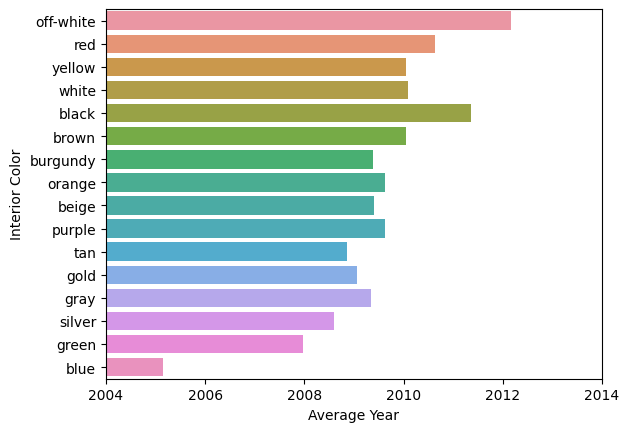

In [137]:
ax = sns.barplot(x=df_color_condition['year'],y=df_color_condition['interior'])
ax.set(ylabel='Interior Color', xlabel='Average Year')
ax.tick_params(axis='x', rotation=0)
ax.set(xlim=(2004, 2014))
plt.show()

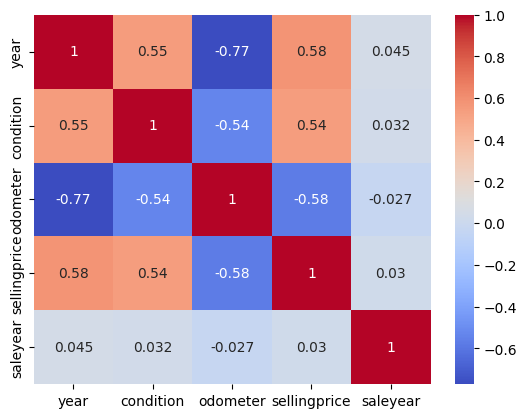

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.show() 

### HEATMAP for inside and outside color, matching with their average price

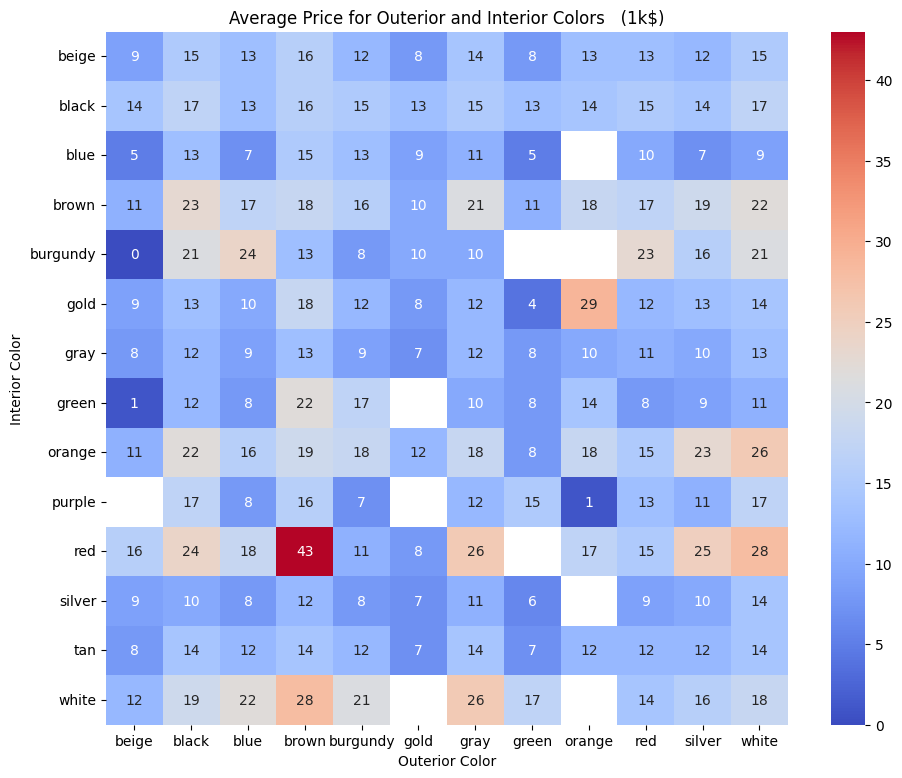

In [273]:
df_inoutHeat = df[['color', 'interior', 'sellingprice']]
df_inoutHeat = df_inoutHeat[df_inoutHeat.interior != '—']
df_inoutHeat = df_inoutHeat[df_inoutHeat.interior != 'off-white']
df_inoutHeat = df_inoutHeat[df_inoutHeat.interior != 'yellow']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != '—']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'off-white']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'pink']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'yellow']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'lime']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'turquoise']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'charcoal']
df_inoutHeat = df_inoutHeat[df_inoutHeat.color != 'purple']

df_inoutHeat = df_inoutHeat.groupby(['color', 'interior']).mean()
df_inoutHeat = df_inoutHeat.unstack(level=0)
df_inoutHeat = df_inoutHeat.round(-3).div(1000)
df_inoutHeat.columns = df_inoutHeat.columns.droplevel(0)
df_inoutHeat
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_inoutHeat,annot=True,cmap='coolwarm')
plt.title('Average Price for Outerior and Interior Colors   (1k$)')
plt.xlabel('Outerior Color')
plt.ylabel('Interior Color')
plt.show()

In [312]:
# label the data
df = pd.read_csv('clean_data.csv', index_col=[0])
print(df.size)
df.head()

list_model = ['BMW', 'Infiniti', 'Mercedes-Benz', 'Audi', 'Nissan', 'Toyota', 'Honda', 'Kia']
df_model = df[df.make.apply(lambda x: x in list_model)]
'''
LYX: BMW, Infiniti, Mercedes-Benz, Audi
Normal: Nissan, Toyota, Honda, Kia
'''
df_model['label'] = 0
lux = ['BMW', 'Infiniti', 'Mercedes-Benz', 'Audi']
df_model['label'] = np.select([(df_model['make'] == 'BMW') | (df_model['make'] == 'Infiniti') | (df_model['make'] == 'Mercedes-Benz')|(df_model['make'] == 'Audi')], ['1'])

# one hot encoding for interior and outside color
one_hot = pd.get_dummies(df_model['color'])
df_model = df_model.drop('color',axis = 1)
df_model = df_model.join(one_hot)

df_model['interior'] = df_model['interior'].replace(['beige','off-white','—','white'], 'interior_white')
df_model['interior'] = df_model['interior'].replace(['silver','gray'], 'interior_gray')
df_model['interior'] = df_model['interior'].replace(['burgundy','red'], 'interior_red')
df_model['interior'] = df_model['interior'].replace(['pink','purple'], 'interior_purple')
df_model['interior'] = df_model['interior'].replace(['lime','turquoise','green'], 'interior_green')
df_model['interior'] = df_model['interior'].replace(['orange','gold','tan','yellow','brown','interior_yellow'], 'interior_brown')
df_model['interior'] = df_model['interior'].replace(['charcoal','black'], 'interior_black')
df_model['interior'] = df_model['interior'].replace(['blue'], 'interior_blue')

one_hot = pd.get_dummies(df_model['interior'])
df_model = df_model.drop('interior',axis = 1)
df_model = df_model.join(one_hot)

# one hot encoding for transmission
df_model['transmission'] = df_model['transmission'].replace(['Sedan'], 'automatic')
df_model['transmission'] = df_model['transmission'].replace(["automatic'"], 'automatic')
one_hot = pd.get_dummies(df_model['transmission'])
df_model = df_model.drop('transmission',axis = 1)
df_model = df_model.join(one_hot)

# one hot encoding for body type
df_model['body'] = df_model['body'].replace(['Crew Cab', 'CrewMax Cab','Access Cab',
                                 'Double Cab','King Cab','Extended Cab','SuperCab','SuperCrew',
                                'Regular Cab','Quad Cab','Club Cab','Xtracab','Cab Plus',
                                 'Cab Plus 4','regular-cab','king cab','supercrew','crew cab','double cab',
                                'regular cab','quad cab','supercab','extended cab','crewmax cab',
                                'xtracab','mega cab','access cab','club cab','Mega Cab','cab plus 4','semi-truck'], 'pick-up truck')
df_model['body'] = df_model['body'].replace(['suv'], 'SUV')
df_model['body'] = df_model['body'].replace(['G Coupe','Elantra Coupe','Genesis Coupe','CTS Coupe','Koup','CTS-V Coupe',
                                'G37 Coupe','Q60 Coupe','g coupe','coupe','genesis coupe','cts coupe','koup','elantra coupe'
                                ,'q60 coupe', 'cts-v coupe','g37 coupe','hatchback','Hatchback'], 'Coupe')
df_model['body'] = df_model['body'].replace(['E-Series Van','Promaster Cargo Van','Ram Van','minivan','Transit Van','van',' Navitgation',
                                'e-series van','transit van','promaster cargo van','Minivan'], 'Van')
df_model['body'] = df_model['body'].replace(['CTS Wagon','TSX Sport Wagon','CTS-V Wagon','wagon','tsx sport wagon','cts wagon'],'Wagon')
df_model['body'] = df_model['body'].replace(['G Convertible','G37 Convertible','Q60 Convertible', 'convertible', 'Beetle Convertible',
       'GranTurismo Convertible','g convertible',
       'g37 convertible', 'beetle convertible', 'granturismo convertible',
       'q60 convertible'], 'Convertible')
df_model['body'] = df_model['body'].replace(['G Sedan','sedan', ' Sedan', 'g sedan'], 'Sedan')

body_type_dummies = pd.get_dummies(df_model.body) 
df_model = df_model.join(body_type_dummies) 
df_model = df_model.drop('body', 1)

df_model.to_csv('train_model.csv')

6140693


/var/folders/p5/ds3m1wg57f34v7pk5fq5kkyr0000gn/T/ipykernel_50226/2649315080.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['label'] = 0
/var/folders/p5/ds3m1wg57f34v7pk5fq5kkyr0000gn/T/ipykernel_50226/2649315080.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['label'] = np.select([(df_model['make'] == 'BMW') | (df_model['make'] == 'Infiniti') | (df_model['make'] == 'Mercedes-Benz')|(df_model['make'] == 'Audi')], ['1'])
/var/folders/p5/ds3m1wg57f34v7pk5fq5kkyr0000gn/T/ipykernel_5